Importujemo potrebne biblioteke.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

import seaborn as sns
sns.set()

Proveravamo strukturu dataseta.

In [3]:
df = pd.read_csv('ParisHousing.csv')
df.shape

(10000, 17)

Dataset ima 10 000 observacija i 17 kolona.

In [4]:
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

Proveravamo nedostajuce vrednosti.

In [6]:
print(df.isna().sum())

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


In [4]:
df["cityCode"].unique().size

9509

Promenljivu 'cityCode' izbacujemo jer ima previse razlicitih vrednosti koje nam nisu znacajne za predvidjanje cene nekretnine.

In [4]:
df = df.drop(columns = ['cityCode'])

Kreiracemo novu promenljivu koja se odnosi na godine starosti zgrade, od promenljive made.

In [5]:
import datetime
current_year = datetime.datetime.now().year
df['buildingAge'] = current_year - df['made']
df.insert(df.columns.get_loc('made') + 1, 'buildingAge', df.pop('buildingAge'))

In [7]:
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityPartRange  \
0         75523              3        0        1      63              3   
1         80771             39        1        1      98              8   
2         55712             58        0        1      19              6   
3         32316             47        0        0       6             10   
4         70429             19        1        1      90              3   

   numPrevOwners  made  buildingAge  isNewBuilt  hasStormProtector  basement  \
0              8  2005           19           0                  1      4313   
1              6  2015            9           1                  0      3653   
2              8  2021            3           0                  0      2937   
3              4  2012           12           0                  1       659   
4              7  1990           34           1                  0      8435   

   attic  garage  hasStorageRoom  hasGuestRoom      price  
0   9005     956               0             7  7559081.5  
1   2436     128               1             2  8085989.5  
2   8852     135               1             9  5574642.1  
3   7141     359               0             3  3232561.2  
4   2429     292               1             4  7055052.0

Izbacujemo kolonu 'made' jer ima isto znacenje kao nova promenljiva 'buildingAge'.

In [6]:
df = df.drop(columns = ['made'])

In [9]:
df.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

       cityPartRange  numPrevOwners  buildingAge    isNewBuilt  \
count   10000.000000   10000.000000  10000.00000  10000.000000   
mean        5.510100       5.521700     18.51150      0.499100   
std         2.872024       2.856667      9.30809      0.500024   
min         1.000000       1.000000      3.00000      0.000000   
25%         3.000000       3.000000     10.00000      0.000000   
50%         5.000000       5.000000     18.50000      0.000000   
75%         8.000000       8.000000     27.00000      1.000000   
max        10.000000      10.000000     34.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

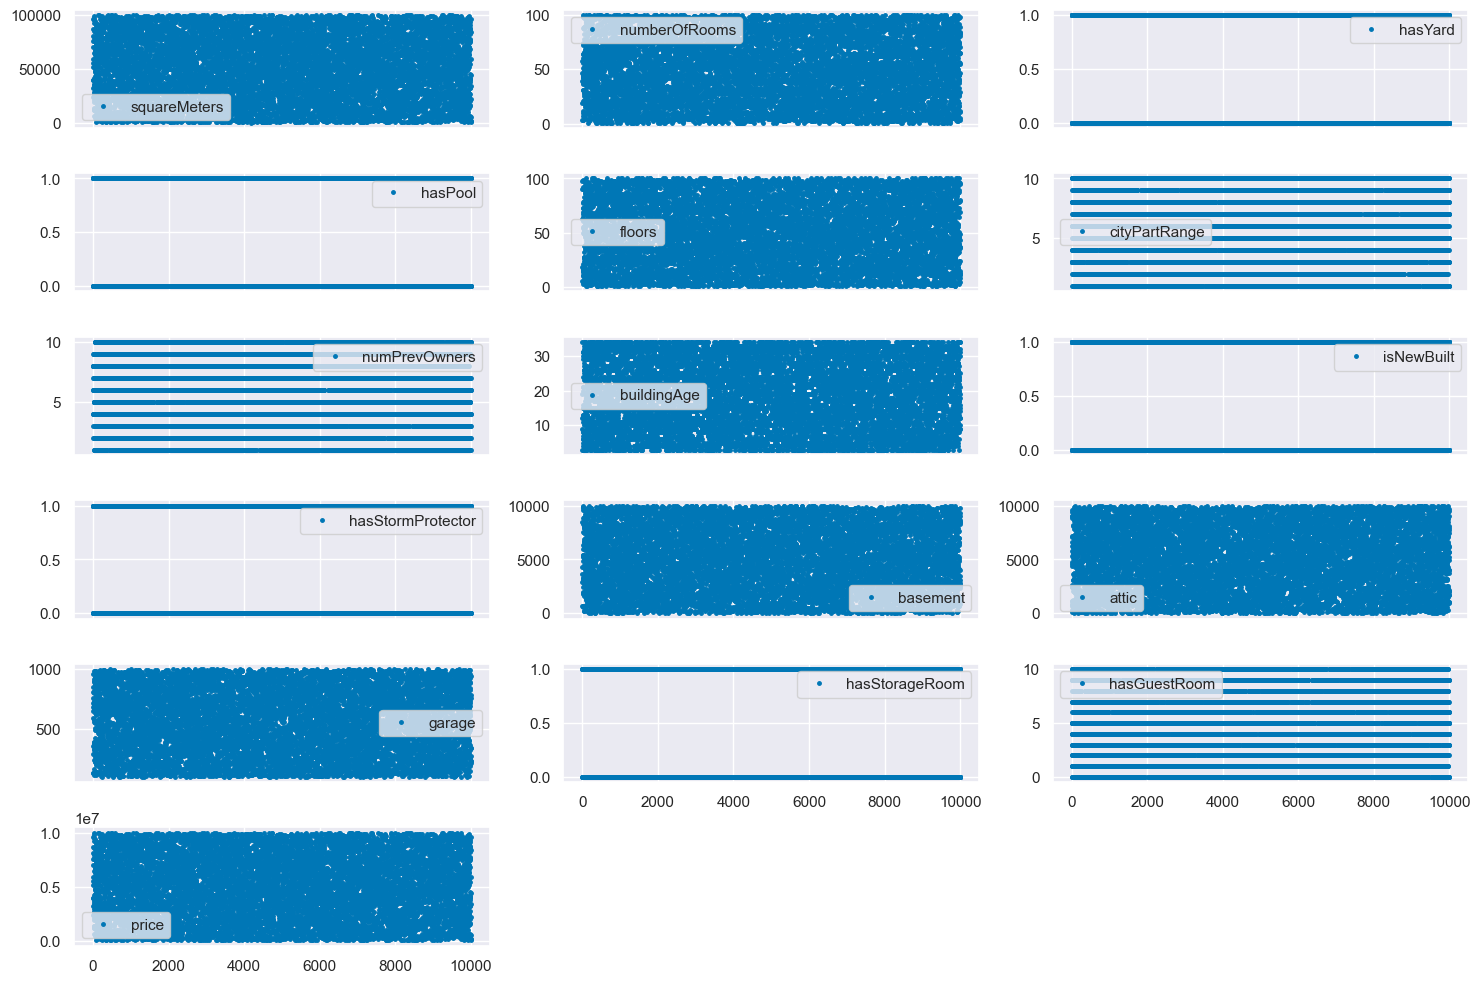

In [13]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(15,10), markersize=5,color='#0077b6')
plt.tight_layout()

Analiza izlazne promenljive:

(array([1029.,  982.,  966.,  997., 1013., 1029., 1026.,  994.,  989.,
         975.]),
 array([   10313.5 ,  1009959.27,  2009605.04,  3009250.81,  4008896.58,
         5008542.35,  6008188.12,  7007833.89,  8007479.66,  9007125.43,
        10006771.2 ]),
 <BarContainer object of 10 artists>)

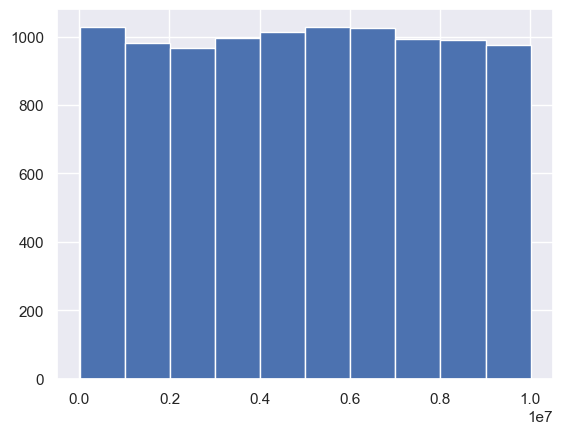

In [28]:
plt.hist(df['price'])

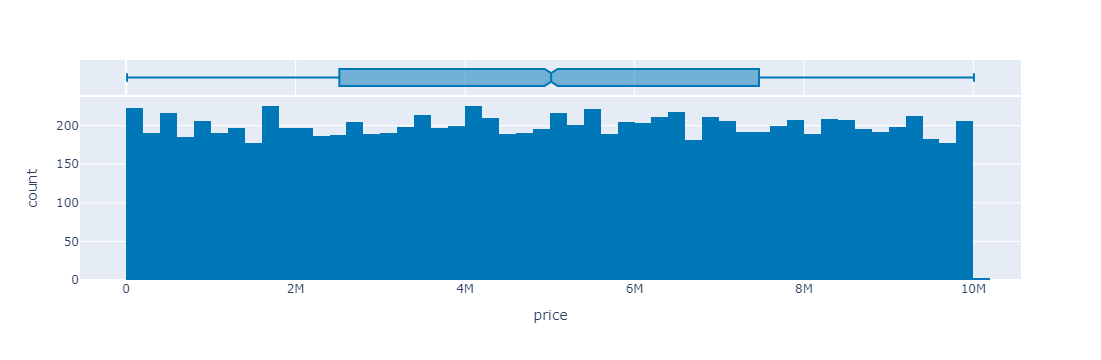

In [23]:
fig = px.histogram(df,  x="price",
                   marginal="box", 
                   hover_data=df.columns,
                   color_discrete_sequence=['#0077b6']
                  )
fig.show()

Postoji nekoliko slucaja koji imaju vrednost preko 10M.

Proveravamo raspodele promenljivih.

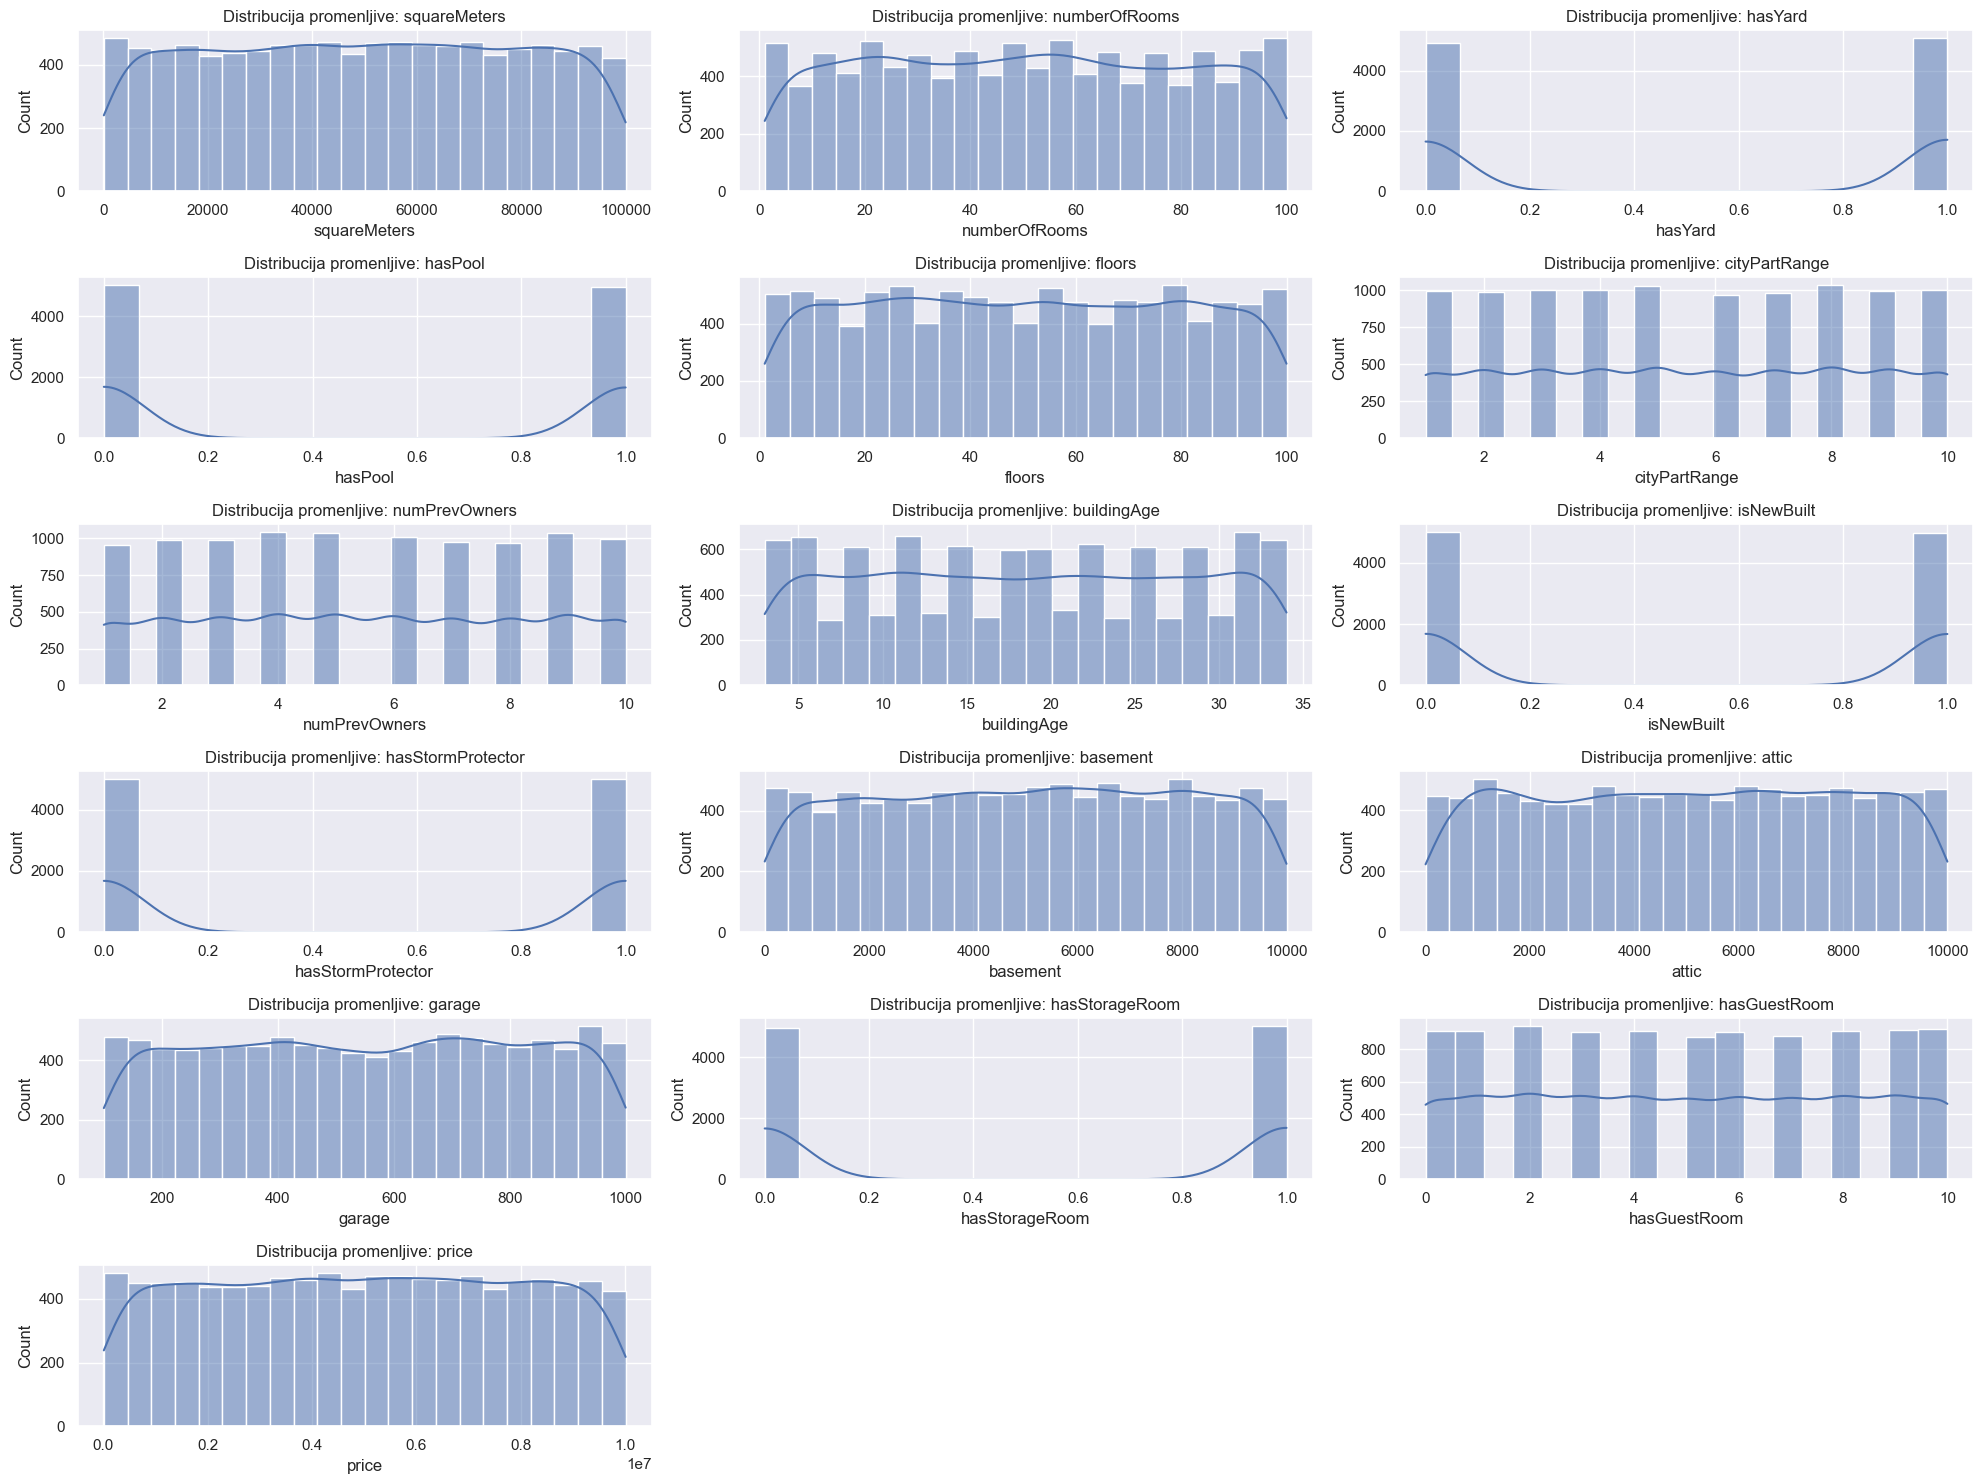

In [14]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribucija promenljive: {col}')

plt.tight_layout()
plt.show()

Proveravamo da li imaju normalnu raspodleu.

In [7]:
from scipy.stats import shapiro

num_cols = df.columns
num_cols = num_cols.drop(['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners', 'buildingAge', 'basement', 'attic', 'garage', 'hasGuestRoom', 'price'])

for col in num_cols:
    stat, p = shapiro(df[col])
    print(f'{col}: p-vrednost = {p}')
    if p > 0.05:
        print(f'{col} ima normalnu raspodelu')
    else:
        print(f'{col} nema normalnu raspodelu')

hasYard: p-vrednost = 5.453747987507309e-90
hasYard nema normalnu raspodelu
hasPool: p-vrednost = 5.531238468837292e-90
hasPool nema normalnu raspodelu
cityCode: p-vrednost = 9.579111537118339e-49
cityCode nema normalnu raspodelu
isNewBuilt: p-vrednost = 5.542494155905357e-90
isNewBuilt nema normalnu raspodelu
hasStormProtector: p-vrednost = 5.54345009856942e-90
hasStormProtector nema normalnu raspodelu
hasStorageRoom: p-vrednost = 5.532717224267636e-90
hasStorageRoom nema normalnu raspodelu


C:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


Nijedna promenljiva nema normalnu raspodelu.

Proveravamo outlajere i simetricnost.

In [27]:
upper_df = df.quantile(0.75) + 1.5 *(df.quantile(0.75) - df.quantile(0.25))
lower_df = df.quantile(0.25) - 1.5 *(df.quantile(0.75) - df.quantile(0.25))

columns_to_be_checked=['squareMeters', 'numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners', 'buildingAge', 'basement', 'attic', 'garage', 'price']

for i in columns_to_be_checked:
    print('\nColumn -> ',i,'\n')
    
    x = df[ (df[i] < round(lower_df[i],2)) | (df[i] > round(upper_df[i],2))][i].to_list()
    print('Skewness -> ',round(df[i].skew(),3) ,' | Outliers presesnt in df -> ',len(x),'  Out of Total -> ',len(df))   
          
    print('\n','*'*10)


Column ->  squareMeters 

Skewness ->  -0.006  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  numberOfRooms 

Skewness ->  0.019  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  floors 

Skewness ->  0.015  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  cityPartRange 

Skewness ->  -0.003  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  numPrevOwners 

Skewness ->  0.002  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  buildingAge 

Skewness ->  0.005  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  basement 

Skewness ->  -0.027  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  attic 

Skewness ->  -0.017  | Outliers presesnt in df ->  0   Out of Total ->  10000

 **********

Column ->  garage 

Skewness ->  -0.019  | Outliers presesnt in df ->  0  

Vidimo da u datasetu ne postoje outlajeri i asimetricnost je jako mala tako da skaliranje nije potrebno.

Kreiramo korelacionu matricu

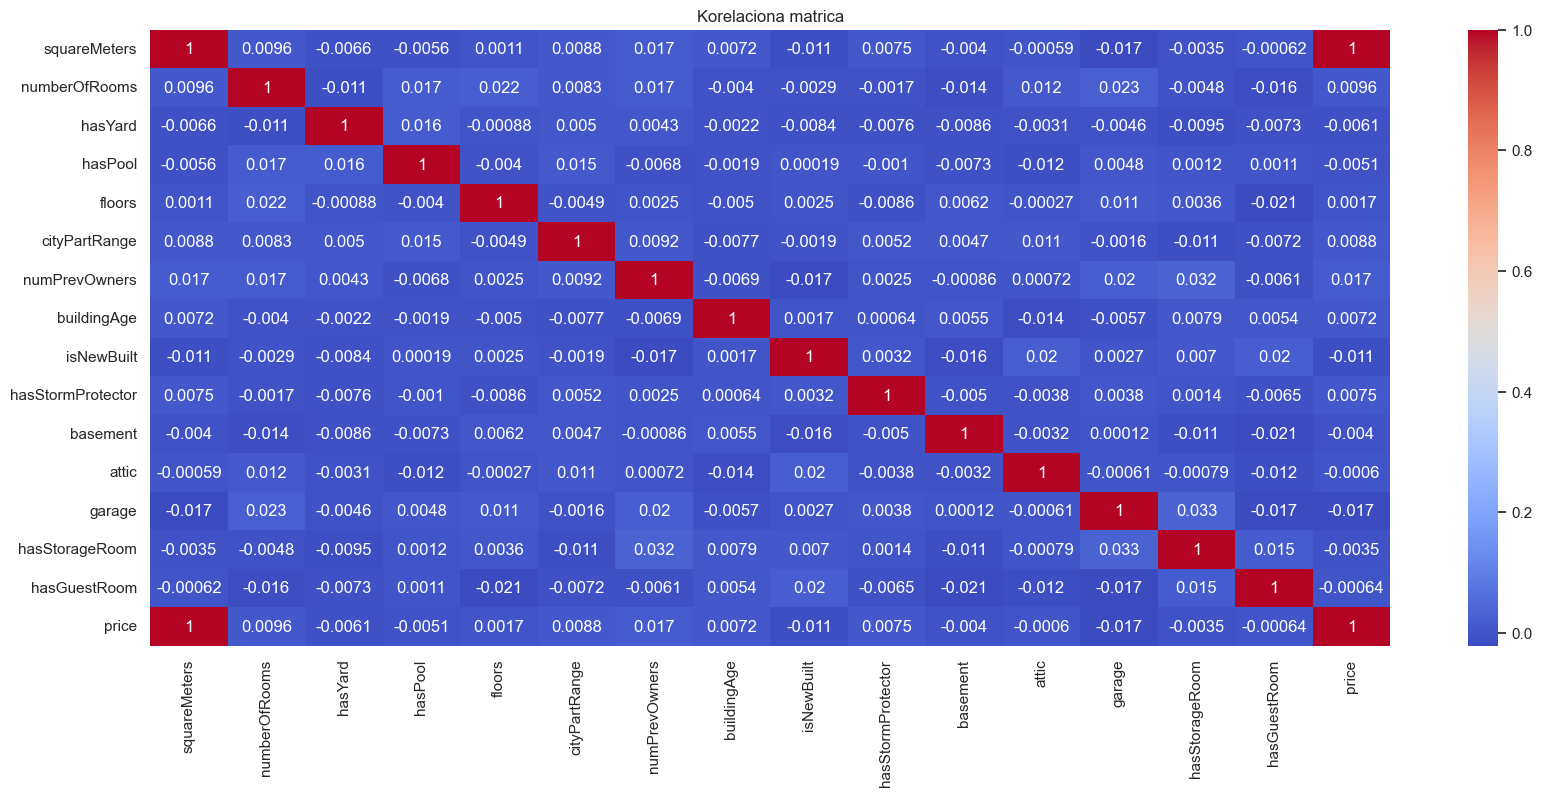

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelaciona matrica')
plt.show()

In [13]:
# df = df.drop(columns = ['squareMeters'])

<h3>Feature engineering</h3>

Potrebno je povecati korelacije sa izlaznom promeljivom price.

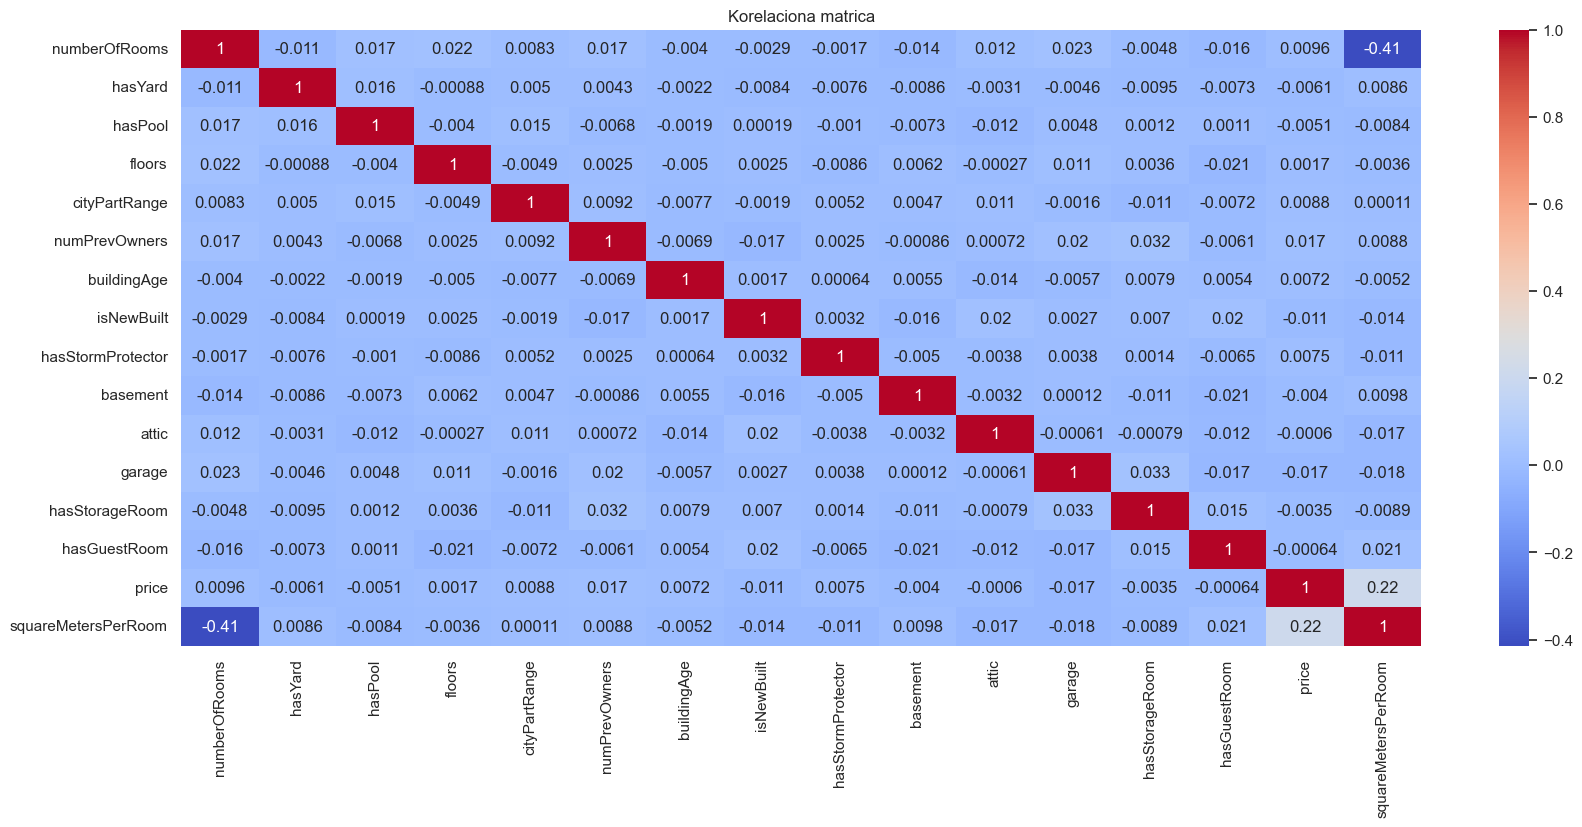

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelaciona matrica')
plt.show()

Binarne i kategorijske promeljive

Kreiranje nove promenljive koja predstavlja prosecnu povrsinu po sobi.

In [7]:
df['squareMetersPerRoom'] = df['squareMeters'] / df['numberOfRooms']

Izbacujemo promenljivu squareMeters.

In [8]:
df = df.drop(columns = ['squareMeters'])

<h4>Standardizacija</h4>

In [9]:
columns_st = ['numberOfRooms', 'floors', 'cityPartRange', 'numPrevOwners', 'buildingAge', 'basement', 'attic', 'garage', 'hasGuestRoom', 'price']

for kolona in columns_st:
    medijana = df[kolona].median()
    q1 = df[kolona].quantile(0.25)
    q3 = df[kolona].quantile(0.75)
    iqr = q3 - q1
    df[kolona] = (df[kolona] - medijana) / iqr

In [10]:
df.head()

numberOfRooms  hasYard  hasPool    floors  cityPartRange  numPrevOwners  \
0          -0.94        0        1  0.254902           -0.4            0.6   
1          -0.22        1        1  0.941176            0.6            0.2   
2           0.16        0        1 -0.607843            0.2            0.6   
3          -0.06        0        0 -0.862745            1.0           -0.2   
4          -0.62        1        1  0.784314           -0.4            0.4   

   buildingAge  isNewBuilt  hasStormProtector  basement     attic    garage  \
0     0.029412           0                  1 -0.157427  0.787511  0.894327   
1    -0.558824           1                  0 -0.290720 -0.518843 -0.947720   
2    -0.911765           0                  0 -0.435323  0.757085 -0.932147   
3    -0.382353           0                  1 -0.895385  0.416824 -0.433815   
4     0.911765           1                  0  0.675048 -0.520235 -0.582870   

   hasStorageRoom  hasGuestRoom     price  squareMetersPerRoom  
0               0      0.333333  0.513438         25174.333333  
1               1     -0.500000  0.619827          2071.051282  
2               1      0.666667  0.112759           960.551724  
3               0     -0.333333 -0.360131           687.574468  
4               1     -0.166667  0.411670          3706.789474

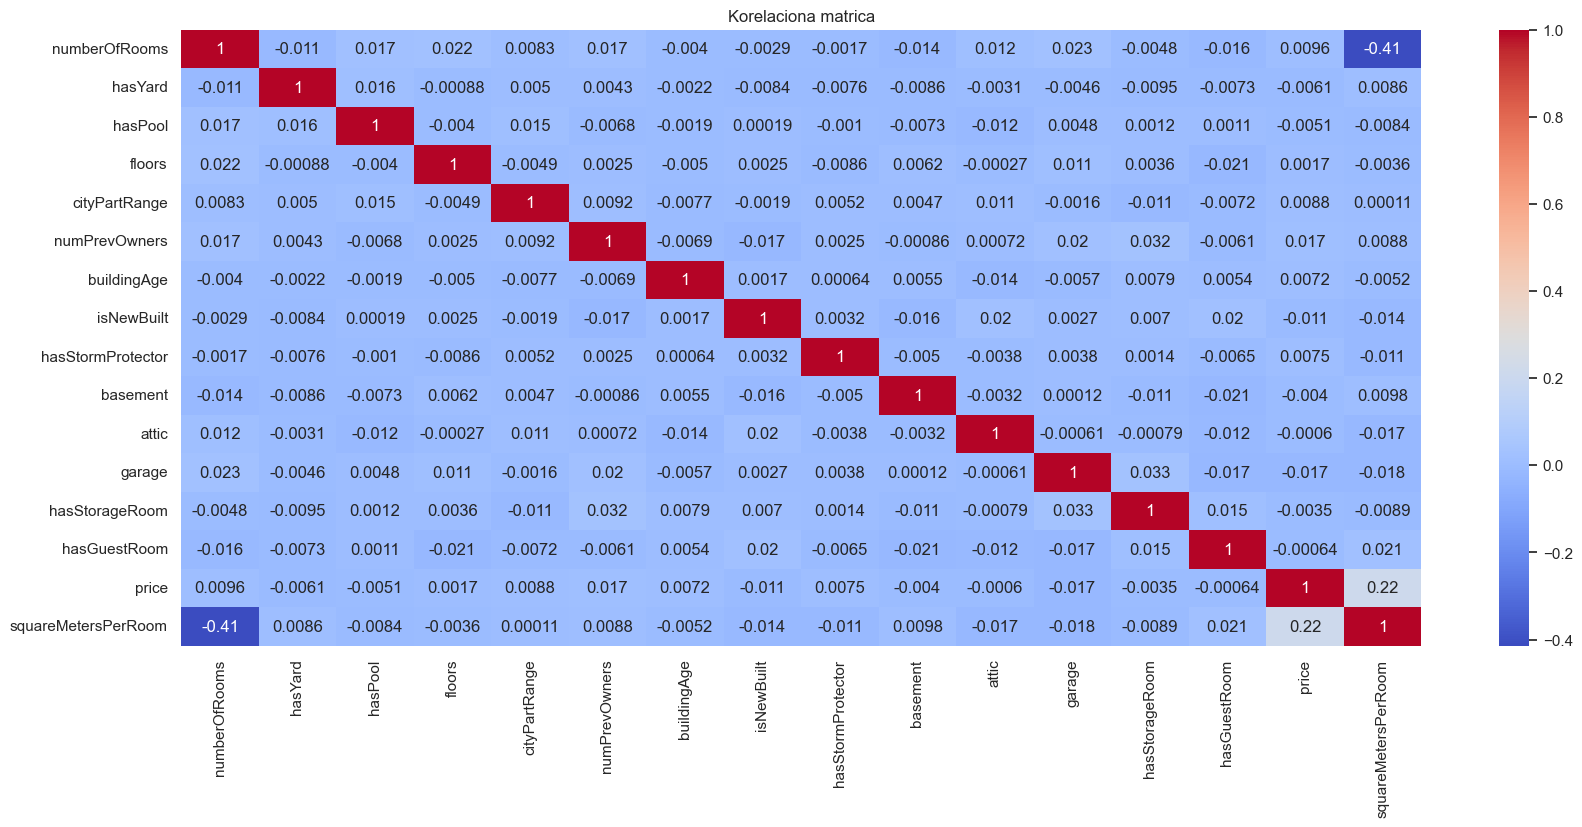

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelaciona matrica')
plt.show()

<h3>Podela podataka na trening i test</h3>

In [32]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

Kreiramo model

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

LR = LinearRegression()

cv_dict = cross_validate(LR, X_train, y_train, cv = 5, scoring=['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2'])
print(cv_dict)

{'fit_time': array([0.11910057, 0.10144353, 0.08388114, 0.16369963, 0.15545201]), 'score_time': array([0.00916958, 0.00754833, 0.00636673, 0.00498605, 0.00693965]), 'test_neg_mean_absolute_error': array([-2587.46310941, -2589.84895065, -2504.41437956, -2426.80528173,
       -2534.32735929]), 'test_neg_mean_squared_error': array([-36217735.51900767, -33547376.90007264, -32708756.55486635,
       -25054593.17451281, -28569113.50153312]), 'test_r2': array([0.20437392, 0.22873248, 0.20715246, 0.24350867, 0.24129979])}


In [36]:
def error_stats(cv_dict):
    stats = {}
    for k,v in cv_dict.items(): 
        stats.update({k:(v.mean(), v.std())})
    return(stats)

error_stats(cv_dict)

{'fit_time': (0.12471537590026856, 0.03067589418520241),
 'score_time': (0.007002067565917969, 0.0013761100990661694),
 'test_neg_mean_absolute_error': (-2528.5718161288864, 60.32612565114086),
 'test_neg_mean_squared_error': (-31219515.129998516, 3940809.0288321157),
 'test_r2': (0.2250134621336266, 0.01652969739315249)}

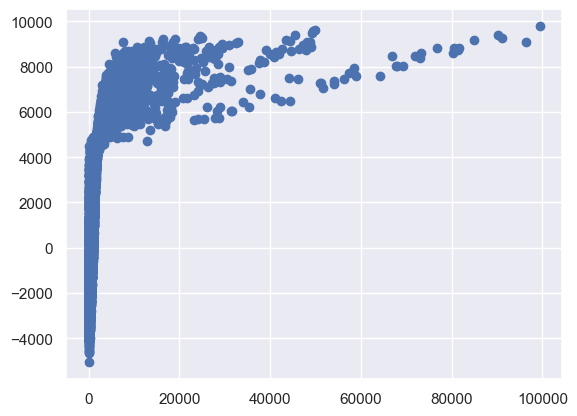

In [37]:
lr = LR.fit(X_train,y_train)
y_hat = lr.predict(X_train)

plt.scatter(y_train, y_hat)

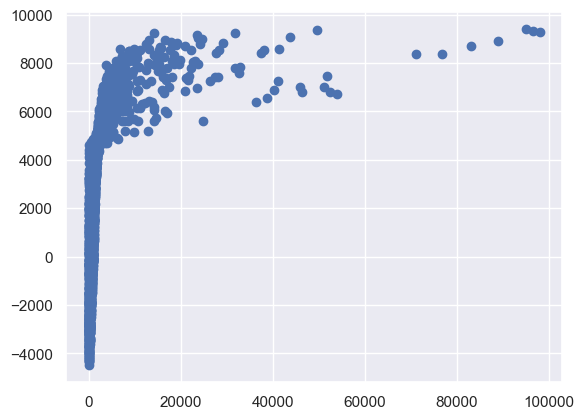

In [38]:
y_hat = lr.predict(X_test)

plt.scatter(y_test, y_hat)